In [2]:
# импорт всего, что нам понадобится
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns


In [3]:
# считываем данные
df = pd.read_csv("data/AirQualityUCI.csv", parse_dates=[['Date', 'Time']], sep = ";",decimal =",")

df['Date_Time'] = pd.to_datetime(df.Date_Time , format = '%d/%m/%Y %H.%M.%S')
data = df.drop(['Date_Time'], axis=1)
data.index = df.Date_Time

C:\Users\Mi\AppData\Local\Temp\ipykernel_63872\741455977.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("data/AirQualityUCI.csv", parse_dates=[['Date', 'Time']], sep = ";",decimal =",")


In [12]:
# заменяем отсутствующие значения (см предыдущий блокнот)
df = data.copy()
cols = df.columns
 
for j in range(1,len(cols)):
    for i in range(0,len(df.iloc[:,j])):
       if df.iloc[i,j] == -200.0:
           df.iloc[i,j] = df.iloc[i,j-1]


C:\Users\Mi\AppData\Local\Temp\ipykernel_63872\346023607.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1.7' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[i,j] = df.iloc[i,j-1]
C:\Users\Mi\AppData\Local\Temp\ipykernel_63872\346023607.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1.2' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[i,j] = df.iloc[i,j-1]
C:\Users\Mi\AppData\Local\Temp\ipykernel_63872\346023607.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1.4' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[i,j] = df.iloc[i,j-1]


In [13]:
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date_Time,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-03-10 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-03-10 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-03-10 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-03-10 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [14]:
df.tail()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date_Time,,,,,,,,,,,,,
2005-04-04 10:00:00,3.1,1314.0,1314.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
2005-04-04 11:00:00,2.4,1163.0,1163.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
2005-04-04 12:00:00,2.4,1142.0,1142.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
2005-04-04 13:00:00,2.1,1003.0,1003.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139
2005-04-04 14:00:00,2.2,1071.0,1071.0,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


In [15]:
print(df.index.freq)

None


In [16]:
df.shape

(9357, 13)

In [17]:
# кол-во элементов для тестовой выборки
test_split_number=round(len(df)*0.25)
test_split_number

2339

In [18]:
# разбиваем на тест и трейн
df_for_training=df[:-test_split_number]
df_for_testing=df[-test_split_number:]


print(df_for_training.shape)
print(df_for_testing.shape)

(7018, 13)
(2339, 13)


In [19]:
# когда данные смотрели, было видно, что они не нормированные. Нормируем.
scaler = MinMaxScaler(feature_range=(0,1))
df_for_training_scaled = scaler.fit_transform(df_for_training)

In [20]:
df_for_training_scaled

array([[0.95611137, 0.69642857, 0.15851449, ..., 0.46739606, 0.54463895,
        0.43929497],
       [0.95327985, 0.66607143, 0.14130435, ..., 0.46673961, 0.54201313,
        0.43922429],
       [0.95422369, 0.71517857, 0.13043478, ..., 0.46367615, 0.55579869,
        0.43927834],
       ...,
       [0.        , 0.521875  , 0.52943841, ..., 0.4619256 , 0.58052516,
        0.43951882],
       [0.        , 0.50848214, 0.51585145, ..., 0.45995624, 0.58402626,
        0.43945799],
       [0.        , 0.51830357, 0.52581522, ..., 0.45842451, 0.59102845,
        0.43946236]])

In [21]:
df_for_training_scaled.shape

(7018, 13)

In [22]:
df_for_testing_scaled=scaler.transform(df_for_testing)
df_for_testing_scaled.shape

(2339, 13)

In [23]:
def createXY(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
            dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            dataY.append(dataset[i,0])
    return np.array(dataX),np.array(dataY) 

In [26]:
n_past = 50 # сколько точек будет предсказывать

trainX,trainY=createXY(df_for_training_scaled,n_past)

testX,testY=createXY(df_for_testing_scaled,n_past)

In [25]:
trainX.shape

(6968, 50, 13)

In [27]:
testX.shape

(2289, 50, 13)

In [30]:
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [61]:
# собираем lstm-ку
def build_model(optimizer="adam", npas = n_past, icol = 13):
    grid_model = Sequential()
    grid_model.add(LSTM(20 + n_past,return_sequences=True,input_shape=(n_past,icol)))
    grid_model.add(LSTM(20 + n_past))
    grid_model.add(Dropout(0.2))
    grid_model.add(Dense(1))

    grid_model.compile(loss = 'mse',optimizer = optimizer)
    return grid_model

grid_model = KerasRegressor(model=build_model,verbose=1, fit__validation_data=(testX,testY))
parameters = {'batch_size' : [16,20],
              'epochs' : [8,10],
              'optimizer' : ['adam','Adadelta'] }

grid_search  = GridSearchCV(estimator = grid_model,
                            param_grid = parameters,
                            cv = 2)

In [62]:
# обучаем  и ищем новые параметры
grid_search = grid_search.fit(trainX,trainY)

Epoch 1/8
218/218 [==============================] - 8s 26ms/step - loss: 0.0536 - val_loss: 0.0345
Epoch 2/8
218/218 [==============================] - 5s 25ms/step - loss: 0.0355 - val_loss: 0.0264
Epoch 3/8
218/218 [==============================] - 6s 25ms/step - loss: 0.0310 - val_loss: 0.0247
Epoch 4/8
218/218 [==============================] - 11s 50ms/step - loss: 0.0284 - val_loss: 0.0260
Epoch 5/8
218/218 [==============================] - 12s 53ms/step - loss: 0.0264 - val_loss: 0.0244
Epoch 6/8
218/218 [==============================] - 5s 25ms/step - loss: 0.0250 - val_loss: 0.0221
Epoch 7/8
218/218 [==============================] - 5s 23ms/step - loss: 0.0240 - val_loss: 0.0215
Epoch 8/8
218/218 [==============================] - 2s 8ms/step
Epoch 1/8
218/218 [==============================] - 8s 27ms/step - loss: 0.0579 - val_loss: 0.0333
Epoch 2/8
218/218 [==============================] - 5s 24ms/step - loss: 0.0402 - val_loss: 0.0278
Epoch 3/8
218/218 [==============

In [64]:
# смотрим, какие параметры были лучшими

grid_search.best_params_

{'batch_size': 16, 'epochs': 8, 'optimizer': 'Adadelta'}

In [65]:
# заполняем лучшими параметрами
my_model=grid_search.best_estimator_.model
my_model

<function __main__.build_model(optimizer='adam', npas=50, icol=13)>

In [68]:
# делаем предикт по лучшим гиперпараметрам

prediction=grid_search.best_estimator_.predict(testX)

print(f"prediction {prediction} \n")
print(f"Prediction Shape {prediction.shape}")

144/144 [==============================] - 2s 7ms/step
prediction [0.06855839 0.05846428 0.07578931 ... 0.9689836  0.9695574  0.9596171 ] 

Prediction Shape (2289,)


In [72]:
#  Теперь вспоминаем, что мы отмасщтабировали значения. Нужно вернуть все назад. Но прямо сделать не получится.
# Следующий код вызовет ошибку, так как делали трансформацию на матрице, а засунуть пытаемся вектор:
scaler.inverse_transform(prediction.reshape(-1, 1))

ValueError: non-broadcastable output operand with shape (2289,1) doesn't match the broadcast shape (2289,13)

In [73]:
pred = prediction.reshape(-1, 1) # без этого никак

prediction_copies_array = np.repeat(pred,13, axis=-1)  # обманываем систему
prediction_copies_array.shape

(2289, 13)

In [76]:
# теперь будет все норм
cfs = len(df.columns)

prediction=scaler.inverse_transform(np.reshape(prediction_copies_array,(len(prediction_copies_array),cfs)))[:,0]
prediction

array([-185.47249  , -187.61142  , -183.94025  , ...,    5.327623 ,
          5.449214 ,    3.3428588], dtype=float32)

In [81]:
# тоже самое повторяем с истинными значениями
original_copies_array = np.repeat(testY.reshape(-1, 1),cfs, axis=-1)
original_copies_array.shape

(2289, 13)

In [83]:

original=scaler.inverse_transform(np.reshape(original_copies_array,(len(testY),cfs)))[:,0]

In [84]:
print(f"Pred Values-- {prediction}\n\n")
print(f"Original Values-- {original}")

Pred Values-- [-185.47249   -187.61142   -183.94025   ...    5.327623     5.449214
    3.3428588]


Original Values-- [-200.  -200.  -200.  ...    2.4    2.1    2.2]


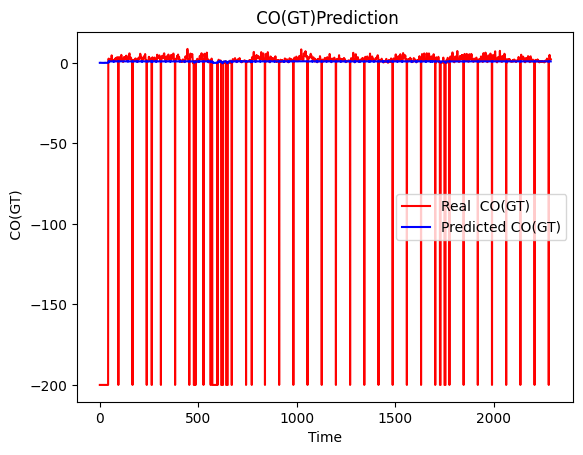

In [85]:
plt.plot(original, color = 'red', label = 'Real  CO(GT)')
plt.plot(pred, color = 'blue', label = 'Predicted CO(GT)')
plt.title(' CO(GT)Prediction')
plt.xlabel('Time')
plt.ylabel(' CO(GT)')
plt.legend()
plt.show()